In [1]:
import pandas as pd
import seaborn as sns
import plotly
import plotly.express as px
import matplotlib.pyplot as plt


In [11]:
churn_data = pd.read_csv('/content/drive/MyDrive/churn.csv')

churn_df = churn_data.drop(labels='RowNumber', axis=1)

churn_df.rename(columns={'customerid': 'customer_id', 'CreditScore': 'credit_score', 'NumOfProducts': 'num_of_products', 'HasCrCard': 'has_cr_card', 'IsActiveMember': 'is_active_member', 'EstimatedSalary': 'estimated_salary'}, inplace=True)
churn_df = churn_df.rename(columns=lambda x: x.lower())


In [12]:
churn_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        10000 non-null  int64  
 1   surname           10000 non-null  object 
 2   credit_score      10000 non-null  int64  
 3   geography         10000 non-null  object 
 4   gender            10000 non-null  object 
 5   age               10000 non-null  int64  
 6   tenure            10000 non-null  int64  
 7   balance           10000 non-null  float64
 8   num_of_products   10000 non-null  int64  
 9   has_cr_card       10000 non-null  int64  
 10  is_active_member  10000 non-null  int64  
 11  estimated_salary  10000 non-null  float64
 12  exited            10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [13]:
churn_df.head(10)


,customerid,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


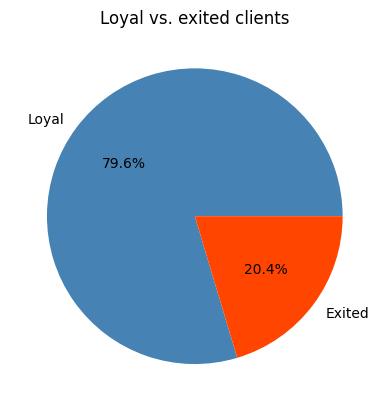

In [14]:
# Ratio of exited and loyal customers

loyal_count = churn_df['exited'].value_counts().loc[0]
exited_count = churn_df['exited'].value_counts().loc[1]

client_data = pd.DataFrame({'Client Status': ['Loyal', 'Exited'],
                     'Count': [loyal_count, exited_count]})

colors = ['steelblue', 'orangered']
plt.pie(client_data['Count'], labels=client_data['Client Status'], autopct='%1.1f%%', colors=colors)
plt.title('Loyal vs. exited clients')

plt.show()


The ratio suggests that most customers are loyal. This is a positive sign for the business, indicating a higher level of customer satisfaction and retention.
Having a high percentage of loyal customers can be beneficial for the stability of the company, customer relationships, and revenue generation.
However, one should not lose sight of the percentage of customers who have decided to terminate their relationship with the bank, which is 20.4%.
In general, although the high percentage of loyal customers is encouraging, it is important for the company to focus on reducing the percentage of customers who have left, increase customer retention and maintain long-term interaction with them.

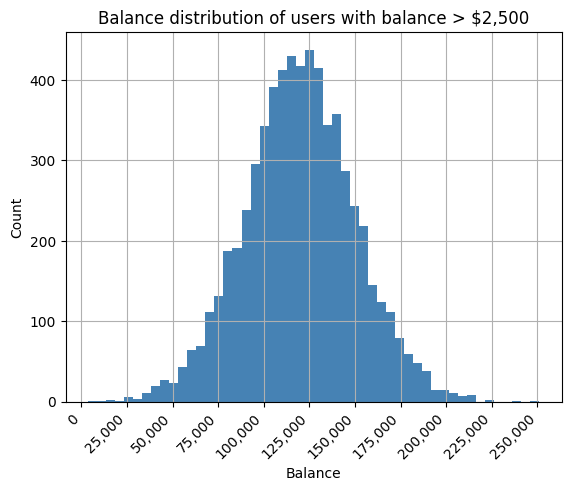

In [15]:
# Histogram that showing the balance distribution of users who have more than $2,500 in their account

filtered_df = churn_df[churn_df['balance'] > 2500]

plt.hist(filtered_df['balance'], bins=50, color='steelblue')

step_size = 25000
tick_locations = range(0, int(filtered_df['balance'].max()) + 1, step_size)
plt.xticks(tick_locations, [f"{x:,.0f}" for x in tick_locations], rotation=45, ha='right')

plt.title('Balance distribution of users with balance > $2,500')
plt.xlabel('Balance')
plt.ylabel('Count')
plt.grid(True)

plt.show()


The distribution shows that the bank is very popular among customers who have between 100,000 and 150,000 dollars on their balance sheet.
This may be due to various reasons, such as the bank's positioning in the market, competition from specialized
money management institutions, or the preferences of wealthy clients to diversify their funds in several financial institutions.
Customers with a smaller balance may also be more inclined to use alternative banking options or digital financial services that specifically meet their needs (for example, high interest on deposits or low loan rates).
In general, the popularity of the bank among customers with a balance of 100,000 to 150,000 indicates a successful positioning in this segment.
However, to further expand its customer base, the bank could consider strategies to attract customers with large balances and explore opportunities to serve customers with smaller balances by offering customized products, improved accessibility or targeted marketing campaigns.

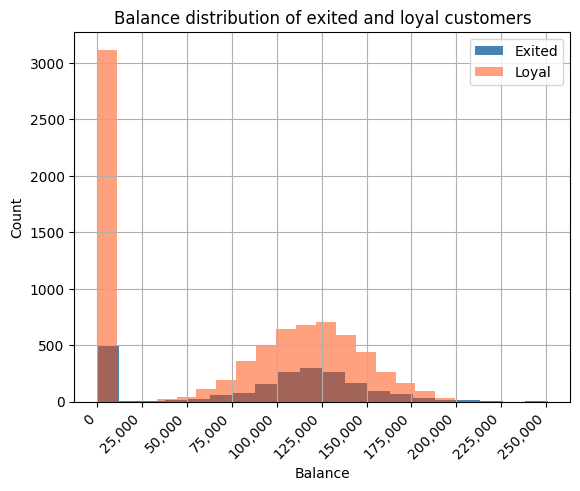

In [16]:
# Вistribution of the client's balance in the context of the outflow indicator. Differences in the amount on the savings account of departed and loyal customers

exited_customers = churn_df[churn_df['exited'] == 1]
loyal_customers = churn_df[churn_df['exited'] == 0]

plt.hist(exited_customers['balance'], bins=20, color='steelblue', alpha=1, label='Exited')
plt.hist(loyal_customers['balance'], bins=20, color='orangered', alpha=0.5, label='Loyal')

tick_locations = range(0, int(filtered_df['balance'].max()) + 1, step_size)
plt.xticks(tick_locations, [f"{x:,.0f}" for x in tick_locations], rotation=45, ha='right')

plt.title('Balance distribution of exited and loyal customers')
plt.xlabel('Balance')
plt.ylabel('Count')

plt.legend()
plt.grid(True)

plt.show()


At first glance, the customers who refused the bank's services had a balance similar to the indicators of loyal customers, but if you look at the balance of 200 thousand or more, then a characteristic difference is noticeable.
This may indicate that the banking product has weak support for this category of customers. On the other hand, there is probably active support or favorable conditions for customers with 100+ thousand, so it is clear that the main target group is people with a balance from 100,000 to 150,000. Starting from 175,000, the gap between departed and loyal customers becomes not so large, which may tell us that there is a reason to study take a closer look at the data.

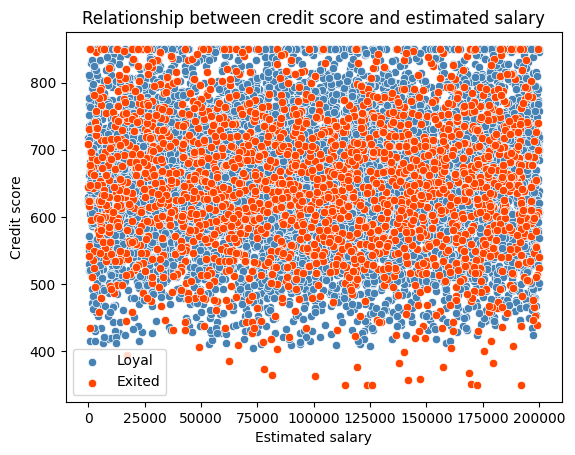

In [20]:
# Scatter plot that shows the relationship between the client's credit rating and his estimated salary.

exited_customers = churn_df[churn_df['exited'] == 1]
loyal_customers = churn_df[churn_df['exited'] == 0]

sns.scatterplot(data=loyal_customers, x='estimated_salary', y='credit_score', color='steelblue', label='Loyal')
sns.scatterplot(data=exited_customers, x='estimated_salary', y='credit_score', color='orangered', label='Exited')

plt.xlabel('Estimated salary')
plt.ylabel('Credit score')
plt.title('Relationship between credit score and estimated salary')

plt.legend()

plt.show()


There is no obvious relationship in this diagram, it is necessary to further refine the data and analyze them separately by groups.

<ipython-input-21-e4de6111be3f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_churn_count.index, y=gender_churn_count.values, palette=colors)


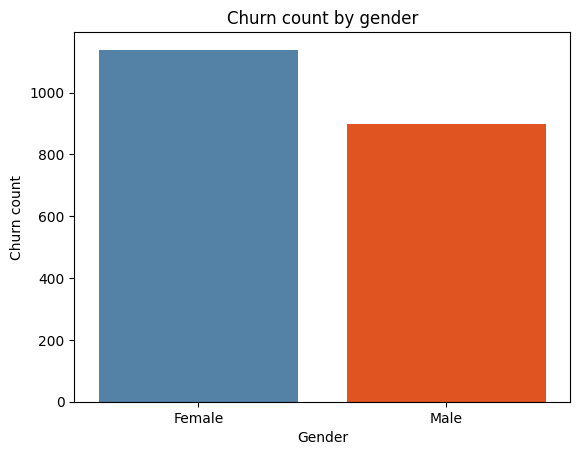

In [21]:
# Who leaves more often, men or women?

gender_churn_count = churn_df.groupby('gender')['exited'].sum()

colors = ['steelblue', 'orangered']
sns.barplot(x=gender_churn_count.index, y=gender_churn_count.values, palette=colors)
plt.xlabel('Gender')
plt.ylabel('Churn count')
plt.title('Churn count by gender')

plt.show()


We see that the female group dominates in terms of outflow. This can be influenced by various factors such as customer satisfaction, quality of service, product offerings, or targeted marketing strategies. Further analysis is needed to determine the main reasons for the higher churn rate among female clients (focus groups, mailing requests, etc.).
By addressing the concerns of female clients and implementing strategies aimed at improving their overall banking experience, the bank can work to reduce the churn rate and strengthen long-term loyalty among this segment of customers.

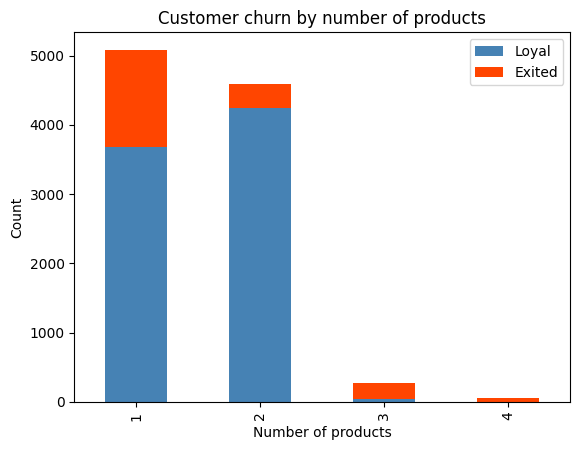

In [22]:
# How does the outflow of customers depend on the number of services purchased from the bank

products_churn_count = churn_df.groupby(['num_of_products', 'exited']).size().unstack()
colors = ['steelblue', 'orangered']
products_churn_count.plot(kind='bar', color=colors, stacked=True)

plt.xlabel('Number of products')
plt.ylabel('Count')
plt.title('Customer churn by number of products')

plt.legend(['Loyal', 'Exited'])

plt.show()


Plot shows that the group of buyers with one product has the largest outflow. This may be due to the level of engagement or satisfaction with the only product they have, as they may not have diversified their banking needs or taken advantage of other offers available from the bank. On the other hand, customers with multiple products may have a stronger relationship with the bank and a higher level of engagement due to the wider range of services or benefits they provide. It is important for the Bank to conduct further research in order to understand the main factors contributing to a higher level of customer churn with a single product. In addition, the bank may consider the possibility of implementing strategies that encourage customers with one product to explore additional offers and diversify their interaction with the bank. It is important to note that customers with 3 or more products in the bank do not get annoyed - the bank should pay attention to the usefulness and interaction between its products, conduct research on the implementation/adaptation of its products to the real needs of customers. It clearly follows from the analysis that when using more than two products, customers immediately change the bank.

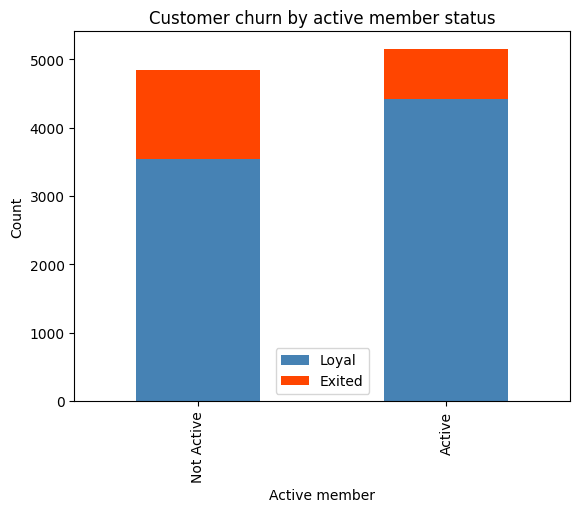

In [23]:
# the effect of having the status of an active client on the outflow of clients

active_churn_count = churn_df.groupby(['is_active_member', 'exited']).size().unstack()
colors = ['steelblue', 'orangered']
active_churn_count.plot(kind='bar', color=colors, stacked=True)

plt.xlabel('Active member')
plt.ylabel('Count')
plt.title('Customer churn by active member status')
plt.xticks(range(len(active_churn_count.index)), ['Not Active', 'Active'])

plt.legend(['Loyal', 'Exited'])

plt.show()


As this plot shows, users with low activity are more likely to terminate their relationship with the bank.
It is necessary to conduct targeted marketing campaigns or implement personalized offers to re-attract inactive customers: offer exclusive benefits or individual promotions to encourage them to continue using the bank's services.
Provide active customer support. This can help solve any problems that customers may have and assist in resuming their interaction with the bank.
It is necessary to ensure that the bank has effective and convenient communication channels for interacting with customers, allowing customers to easily contact and receive prompt responses.
Use customer data and analytics to provide personalized recommendations and suggestions for products or services that match the needs and preferences of inactive customers.
Continuously improve and innovate the products and services offered by the bank based on customer feedback and market trends. By providing valuable and competitive offers, the bank can increase customer satisfaction and loyalty, reducing the likelihood of churn among inactive customers.

In [24]:
# In which country is the share of departed customers higher?

churn_ratio = churn_df.groupby('geography')['exited'].mean().reset_index()

fig = px.choropleth(churn_ratio, locations='geography', locationmode='country names', color='exited',
                    color_continuous_scale='Oranges', range_color=(0, 1), width=900, height=500,
                    title='Customer churn ratio by country')

fig.show()


The visualization shows that the country with the largest outflow of customers is Germany. There may be many possible reasons, in my opinion the most basic ones may be:
Economic factors: Economic conditions and trends specific to Germany may affect the level of outflow.
Cultural factors: Cultural differences and attitudes towards banking services may also play a role.
There is probably a correlation: the largest pool of customers is from Germany, so the weight of their activity outweighs the rest of the regions.
But all these are just speculative assumptions, a proper analysis of the German market is needed to determine the true reason.

tenure,0,1,2,3,4,5,6,7,8,9,10
credit_score_cat,,,,,,,,,,,
Excellent,0.275000,0.208333,0.137255,0.168317,0.131868,0.233333,0.241379,0.127660,0.196078,0.270833,0.254902
Fair,0.217391,0.215596,0.213043,0.216450,0.197248,0.206897,0.236364,0.171103,0.209016,0.190045,0.205357
Good,0.203822,0.203608,0.187342,0.205962,0.195122,0.214470,0.182857,0.191892,0.152355,0.194667,0.197802
Poor,0.226415,0.259398,0.211765,0.212245,0.233202,0.199153,0.179916,0.151261,0.214575,0.251082,0.169492
Very_Poor,0.444444,0.253731,0.151515,0.285714,0.293103,0.149254,0.225352,0.206349,0.253521,0.229508,0.333333


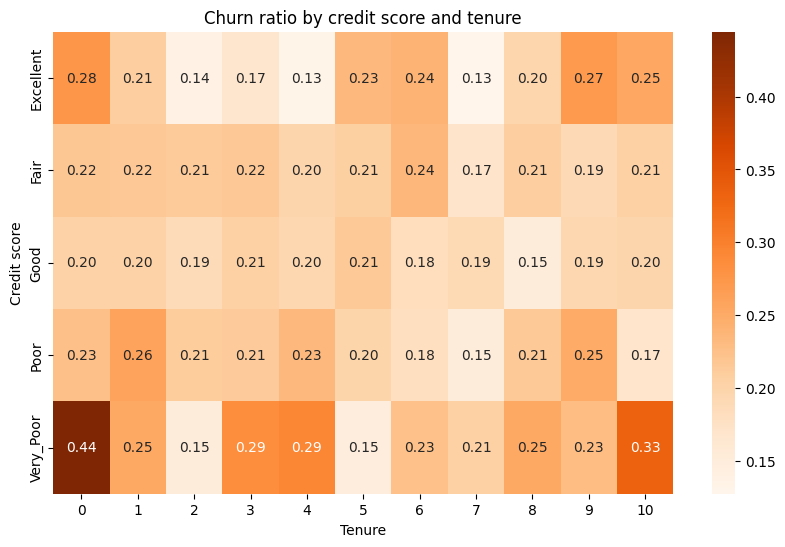

In [25]:
# Convert the numeric attribute of the Credit Score to a categorical one. Create a new CreditScoreCat attribute — the credit rating category.

def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

churn_df['credit_score_cat'] = churn_df['credit_score'].apply(get_credit_score_cat)

# Summary table, the rows of which are the categories of the credit rating (CreditScoreCat), and the columns are the number of years
# during which the client uses bank services (Tenure).
# The cells of the summary table  contain the average of the outflow (Exited) — the proportion of users who left.

credit_score_table = churn_df.groupby(['credit_score_cat', 'tenure'])['exited'].mean().reset_index()
credit_score_table = credit_score_table.pivot(index='credit_score_cat', columns='tenure', values='exited')

display(credit_score_table)

# Based on the resulting summary table, build a heat map with an annotation

plt.figure(figsize=(10, 6))
sns.heatmap(credit_score_table, annot=True, cmap='Oranges', fmt='.2f')
plt.title('Churn ratio by credit score and tenure')
plt.xlabel('Tenure')
plt.ylabel('Credit score')

max_churn_category = credit_score_table.idxmax().values
max_churn_tenure = credit_score_table.max().idxmax()

plt.show()


The category of clients who leave most often are those with a lower credit rating and a shorter period of stay at the bank.
This suggests that there may be certain factors related to credit rating and initial experience in the bank that affect customer loyalty and retention.
Further research could be conducted and targeted strategies developed to improve customer retention within these specific credit rating categories and during the initial stages of customer relationships.